In [2]:
import numpy as np
import pymc as pm

# Example data
x = np.array([1, 2, 3, 4, 5])
m = np.array([10, 20, 30, 25, 15])  # Number of successes
n = np.array([100, 120, 150, 130, 110])  # Number of trials
y = m / n  # Proportions

# Model specification
with pm.Model() as model:
    
    # Weakly informative priors for the coefficients
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=0, sigma=10)
    
    # Linear predictor
    eta = beta_0 + beta_1 * x
    
    # Transform the linear predictor to the probability scale
    p = pm.Deterministic('p', pm.math.sigmoid(eta))  # Logistic transformation to ensure 0 < p < 1
    
    # Likelihood (sampling distribution) of the observations
    y_obs = pm.Binomial('y_obs', n=n, p=p, observed=m)
    
    # Sampling from the posterior
    trace = pm.sample(2000, return_inferencedata=True, tune=1000)

# Summarize the posterior distributions
print(pm.summary(trace))


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta_0 -1.835  0.279  -2.357   -1.305      0.006    0.005    1891.0    1933.0   
beta_1  0.064  0.082  -0.097    0.211      0.002    0.001    1947.0    2052.0   
p[0]    0.147  0.026   0.099    0.196      0.001    0.000    1984.0    2257.0   
p[1]    0.155  0.019   0.120    0.190      0.000    0.000    2419.0    3522.0   
p[2]    0.163  0.015   0.135    0.191      0.000    0.000    5138.0    5724.0   
p[3]    0.172  0.019   0.138    0.207      0.000    0.000    5310.0    5692.0   
p[4]    0.182  0.028   0.133    0.237      0.000    0.000    3240.0    3932.0   

        r_hat  
beta_0    1.0  
beta_1    1.0  
p[0]      1.0  
p[1]      1.0  
p[2]      1.0  
p[3]      1.0  
p[4]      1.0  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


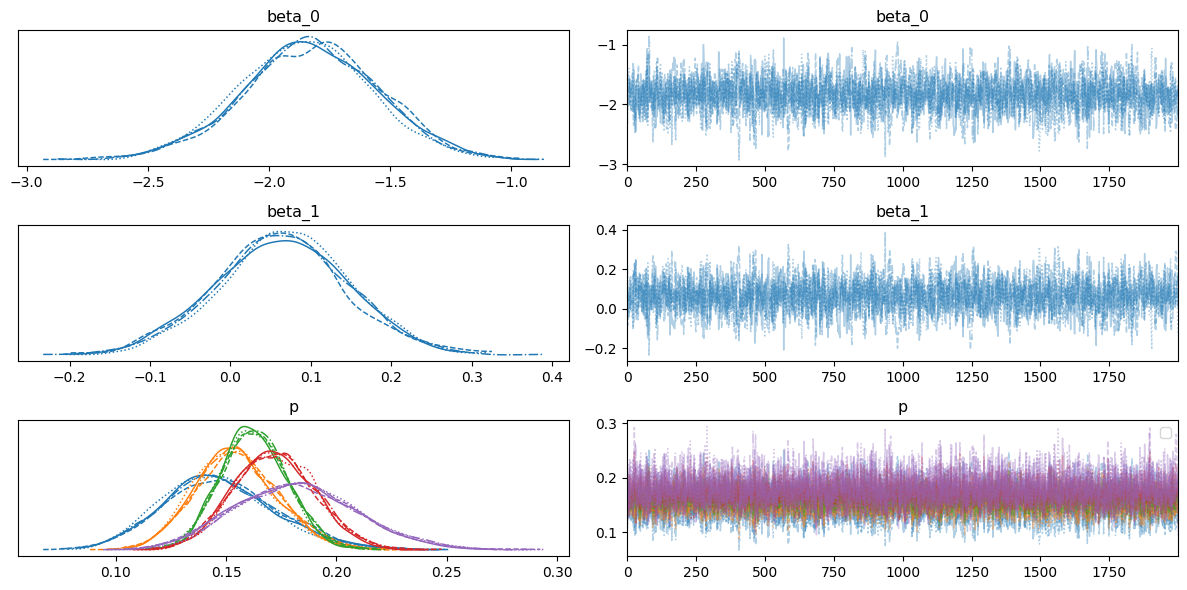

In [7]:
import matplotlib.pyplot as plt

pm.plot_trace(trace)
plt.legend()
plt.tight_layout()
plt.show()
